In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import boto3

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [ ]:
def list_filenames(bucket_name, directory_prefix):
    # Create a boto3 client for S3
    s3 = boto3.client('s3')

    # Initialize a paginator to handle multiple pages of S3 objects (if necessary)
    paginator = s3.get_paginator('list_objects_v2')

    # Create a list to hold the filenames
    filenames = []

    # Use the paginator to fetch all objects within the specified directory
    for page in paginator.paginate(Bucket=bucket_name, Prefix=directory_prefix):
        # Access the 'Contents' from each page which lists the objects
        for obj in page.get('Contents', []):  # Check if 'Contents' key is in page
            filenames.append(obj['Key'])

    return filenames
#Usage
bucket_name = 'moneygans-data'  # Replace with your S3 bucket name
directory_prefix = 'basketball_nba/aggregated_data/'
#2024-11-01/live_odds/'
# 'baseball_mlb/aggregated_data/2024-07-24_all/'  # Ensure this ends with a slash if you're specifying a folder

# Get the list of filenames
file_list = list_filenames(bucket_name, directory_prefix)
print(file_list[1])
df = pd.read_parquet(f's3://moneygans-data/{file_list[1]}', engine='pyarrow')

basketball_nba/aggregated_data/2024-11-01_all/part-00000-6b71e8d3-6a2b-4c54-8205-464ee0b14cfc-c000.snappy.parquet


In [ ]:
df['true_game_time_ms'] = df['last_update'] - df['commence_time']
min_update = abs(df['true_game_time_ms']).min()
min_update
# df[df['true_game_time_ms'] == -min_update]

# df[(df['true_game_time_ms'] >= -0.5) & (df['true_game_time_ms'] <= 200)]
df['id'].unique()
df[df['id'] == 'e3520db55ef2d7e8de8e2ed204a544c8'].iloc[0].to_frame().T

np.argmin(df['true_game_time_ms'].abs())
df.iloc[44426].to_frame().T


,id,sport_key,sport_title,commence_time,home_team,away_team,book,home_money,away_money,pos_money,neg_money,commence_time_est,ts,game_time_ms,game_time_hrs,last_update,last_update_est,true_game_time_ms
44426,4de83a69c1b9c9f100c25c109450b15d,basketball_nba,NBA,1730504400,Atlanta Hawks,Sacramento Kings,espnbet,200,-245,200,-245,2024-11-01T19:40:00-04:00,1730504400.867929,0.867929,0.000241,1730504390,2024-11-01T19:39:50-04:00,-10


In [ ]:
df[(df['id'] == 'e3520db55ef2d7e8de8e2ed204a544c8') & (df['book'] == 'draftkings')] 


,id,sport_key,sport_title,commence_time,home_team,away_team,book,home_money,away_money,pos_money,neg_money,commence_time_est,ts,game_time_ms,game_time_hrs,last_update,last_update_est,true_game_time_ms
0,e3520db55ef2d7e8de8e2ed204a544c8,basketball_nba,NBA,1730502600,Charlotte Hornets,Boston Celtics,draftkings,400,-535,400,-535,2024-11-01T19:10:00-04:00,1.730479e+09,-23967.074648,-6.657521,1730478615,2024-11-01T12:30:15-04:00,-23985
54,e3520db55ef2d7e8de8e2ed204a544c8,basketball_nba,NBA,1730502600,Charlotte Hornets,Boston Celtics,draftkings,400,-535,400,-535,2024-11-01T19:10:00-04:00,1.730487e+09,-16018.977401,-4.449716,1730486550,2024-11-01T14:42:30-04:00,-16050
108,e3520db55ef2d7e8de8e2ed204a544c8,basketball_nba,NBA,1730502600,Charlotte Hornets,Boston Celtics,draftkings,400,-535,400,-535,2024-11-01T19:10:00-04:00,1.730487e+09,-15988.504060,-4.441251,1730486550,2024-11-01T14:42:30-04:00,-16050
162,e3520db55ef2d7e8de8e2ed204a544c8,basketball_nba,NBA,1730502600,Charlotte Hornets,Boston Celtics,draftkings,400,-535,400,-535,2024-11-01T19:10:00-04:00,1.730487e+09,-15958.005437,-4.432779,1730486630,2024-11-01T14:43:50-04:00,-15970
216,e3520db55ef2d7e8de8e2ed204a544c8,basketball_nba,NBA,1730502600,Charlotte Hornets,Boston Celtics,draftkings,400,-535,400,-535,2024-11-01T19:10:00-04:00,1.730487e+09,-15629.560401,-4.341545,1730486959,2024-11-01T14:49:19-04:00,-15641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62507,e3520db55ef2d7e8de8e2ed204a544c8,basketball_nba,NBA,1730502900,Charlotte Hornets,Boston Celtics,draftkings,1000,-2100,1000,-2100,2024-11-01T19:15:00-04:00,1.730510e+09,7170.219518,1.991728,1730510069,2024-11-01T21:14:29-04:00,7169
62547,e3520db55ef2d7e8de8e2ed204a544c8,basketball_nba,NBA,1730502900,Charlotte Hornets,Boston Celtics,draftkings,1000,-2100,1000,-2100,2024-11-01T19:15:00-04:00,1.730510e+09,7185.269643,1.995908,1730510069,2024-11-01T21:14:29-04:00,7169
62588,e3520db55ef2d7e8de8e2ed204a544c8,basketball_nba,NBA,1730502900,Charlotte Hornets,Boston Celtics,draftkings,1000,-2100,1000,-2100,2024-11-01T19:15:00-04:00,1.730510e+09,7200.364327,2.000101,1730510069,2024-11-01T21:14:29-04:00,7169
62629,e3520db55ef2d7e8de8e2ed204a544c8,basketball_nba,NBA,1730502900,Charlotte Hornets,Boston Celtics,draftkings,1000,-2100,1000,-2100,2024-11-01T19:15:00-04:00,1.730510e+09,7215.187491,2.004219,1730510069,2024-11-01T21:14:29-04:00,7169


In [ ]:
MASS_BOOKS = ['draftkings', 'fanduel', 'betmgm', 'williamhill_us', 'espnbet', 'ballybet']
def get_start_lines(df):
    ret_df = pd.DataFrame()
    # Itterates through individual games
    for game_id in df['id'].unique():
        for book in MASS_BOOKS:
            
            game_df = df[(df['id'] == game_id) & (df['book'] == book)] 
            min_line_idx = np.argmin(game_df['true_game_time_ms'].abs())
            start_line = game_df.iloc[min_line_idx].to_frame().T
            ret_df = pd.concat([ret_df, start_line], axis=0)
    return ret_df.reset_index(drop=True)

start_line_df = get_start_lines(df)

    


In [32]:
X = start_line_df[['pos_money', 'neg_money']].astype('int64')
X

,pos_money,neg_money
0,400,-535
1,420,-560
2,350,-500
3,400,-550
4,400,-600
5,390,-530
6,240,-330
7,260,-320
8,240,-300
9,250,-320


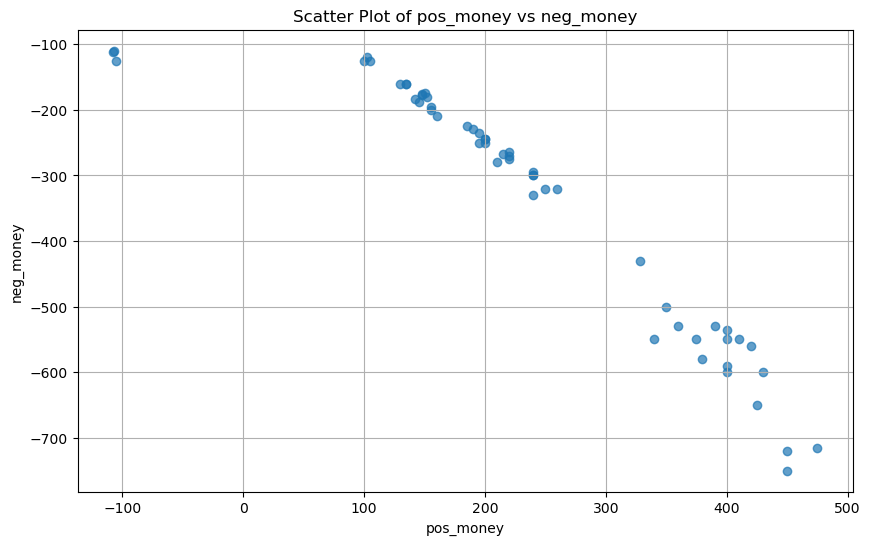

/var/folders/rl/q68vvj6j245f29dbc9dvn47c0000gn/T/ipykernel_22940/1899890006.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/Users/jake/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jake/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


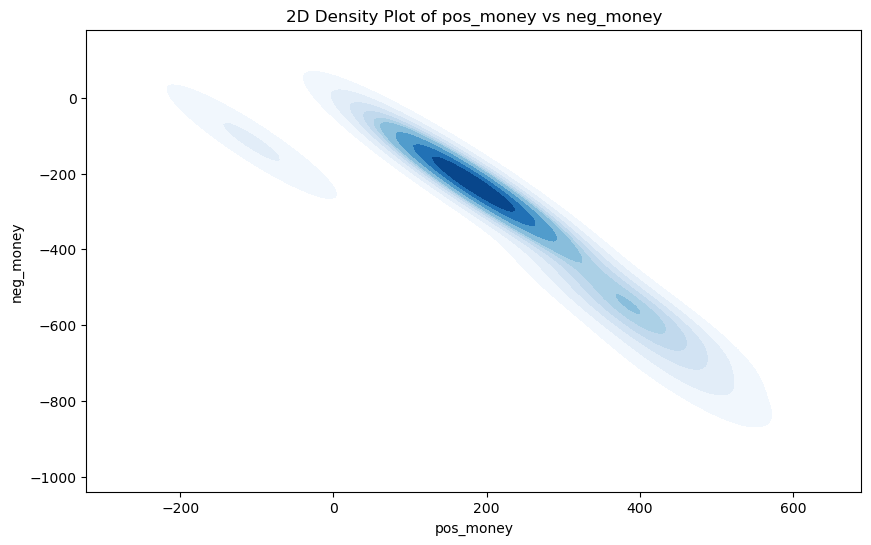

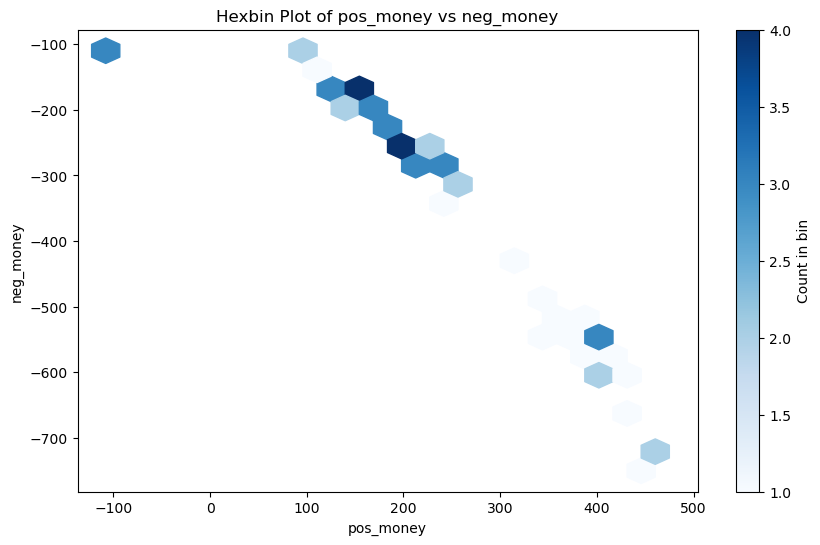

/Users/jake/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jake/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


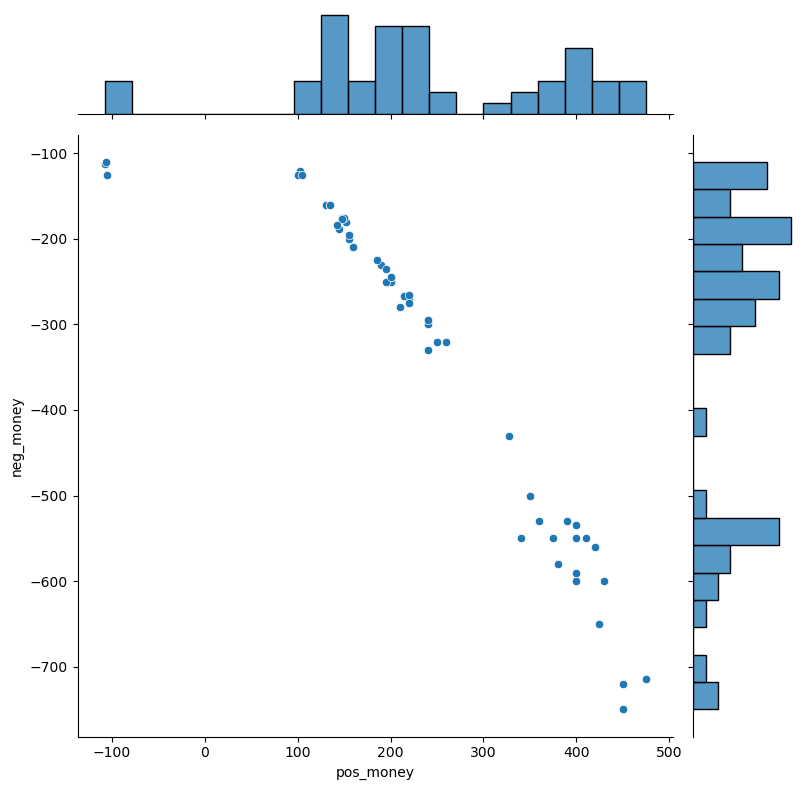

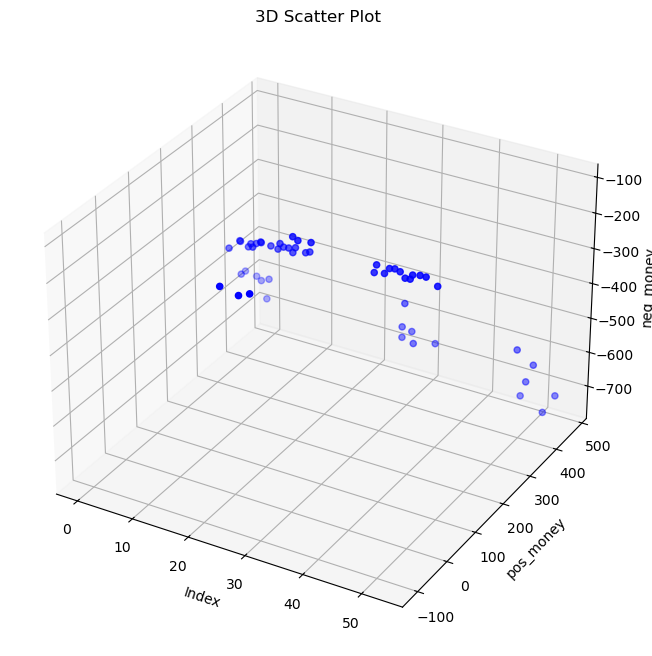

Correlation between pos_money and neg_money: -0.93
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


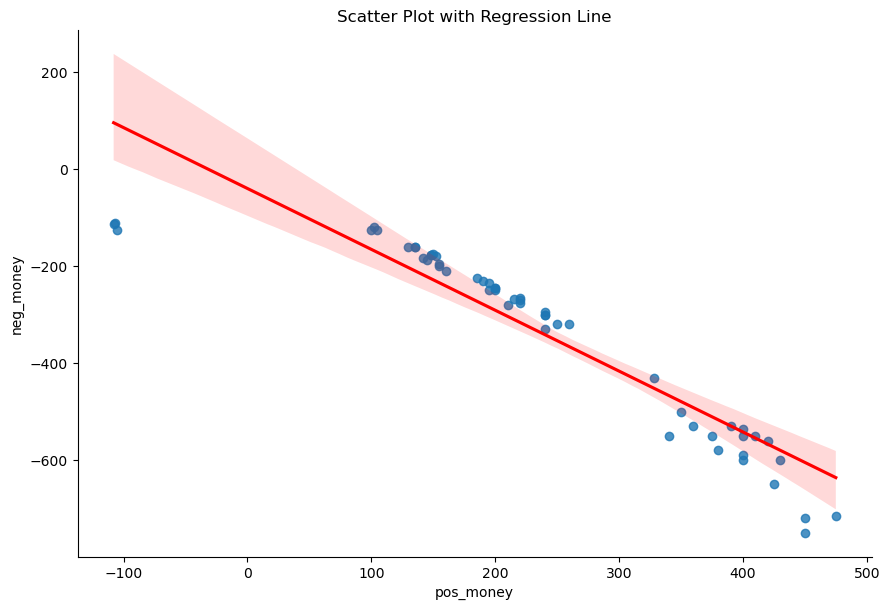

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

df = X

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['pos_money'], df['neg_money'], alpha=0.7)
plt.title('Scatter Plot of pos_money vs neg_money')
plt.xlabel('pos_money')
plt.ylabel('neg_money')
plt.grid(True)
plt.show()

# 2D Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=df['pos_money'],
    y=df['neg_money'],
    cmap="Blues",
    shade=True,
    thresh=0.05,
    bw_adjust=1
)
plt.title('2D Density Plot of pos_money vs neg_money')
plt.xlabel('pos_money')
plt.ylabel('neg_money')
plt.show()

# Hexbin Plot
plt.figure(figsize=(10, 6))
plt.hexbin(df['pos_money'], df['neg_money'], gridsize=20, cmap='Blues', mincnt=1)
plt.title('Hexbin Plot of pos_money vs neg_money')
plt.xlabel('pos_money')
plt.ylabel('neg_money')
cb = plt.colorbar()
cb.set_label('Count in bin')
plt.show()

# Joint Plot
sns.jointplot(
    x='pos_money',
    y='neg_money',
    data=df,
    kind='scatter',
    height=8,
    marginal_kws=dict(bins=20, fill=True)
)
plt.show()

# 3D Scatter Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.index, df['pos_money'], df['neg_money'], c='blue', marker='o')
ax.set_title('3D Scatter Plot')
ax.set_xlabel('Index')
ax.set_ylabel('pos_money')
ax.set_zlabel('neg_money')
plt.show()

# Correlation
correlation = df['pos_money'].corr(df['neg_money'])
print(f'Correlation between pos_money and neg_money: {correlation:.2f}')

# Regression Plot
sns.lmplot(
    x='pos_money',
    y='neg_money',
    data=df,
    height=6,
    aspect=1.5,
    line_kws={'color': 'red'}
)
plt.title('Scatter Plot with Regression Line')
plt.xlabel('pos_money')
plt.ylabel('neg_money')
plt.show()


In [34]:
from matplotlib.backends.backend_pdf import PdfPages

# Create a PdfPages object to save plots to a PDF
pdf_filename = 'plots.pdf'
pdf = PdfPages(pdf_filename)

# Plot 1: Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['pos_money'], df['neg_money'], alpha=0.7)
plt.title('Scatter Plot of pos_money vs neg_money')
plt.xlabel('pos_money')
plt.ylabel('neg_money')
plt.grid(True)
pdf.savefig()
plt.close()

# Plot 2: 2D Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=df['pos_money'],
    y=df['neg_money'],
    cmap="Blues",
    shade=True,
    thresh=0.05,
    bw_adjust=1
)
plt.title('2D Density Plot of pos_money vs neg_money')
plt.xlabel('pos_money')
plt.ylabel('neg_money')
pdf.savefig()
plt.close()

# Plot 3: Hexbin Plot
plt.figure(figsize=(10, 6))
plt.hexbin(df['pos_money'], df['neg_money'], gridsize=20, cmap='Blues', mincnt=1)
plt.title('Hexbin Plot of pos_money vs neg_money')
plt.xlabel('pos_money')
plt.ylabel('neg_money')
cb = plt.colorbar()
cb.set_label('Count in bin')
pdf.savefig()
plt.close()

# Plot 4: Joint Plot
joint_plot = sns.jointplot(
    x='pos_money',
    y='neg_money',
    data=df,
    kind='scatter',
    height=8,
    marginal_kws=dict(bins=20, fill=True)
)
joint_plot.fig.suptitle('Joint Plot of pos_money vs neg_money', y=1.03)
pdf.savefig(joint_plot.fig)
plt.close(joint_plot.fig)

# Plot 5: Regression Plot
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.regplot(
    x='pos_money',
    y='neg_money',
    data=df,
    line_kws={'color': 'red'}
)
plt.title('Regression Plot of pos_money vs neg_money')
plt.xlabel('pos_money')
plt.ylabel('neg_money')
pdf.savefig()
plt.close()

# Close the PDF object
pdf.close()

# # AWS S3 configuration
# s3_bucket_name = 'your-s3-bucket-name'  # Replace with your S3 bucket name
# s3_file_key = 'path/to/plots.pdf'       # Replace with the desired S3 object key

# # Create an S3 client
# s3_client = boto3.client('s3')

# # Upload the file
# try:
#     s3_client.upload_file(pdf_filename, s3_bucket_name, s3_file_key)
#     print(f"File '{pdf_filename}' uploaded to 's3://{s3_bucket_name}/{s3_file_key}' successfully.")
# except Exception as e:
#     print(f"Error uploading file: {e}")

# # Optionally, remove the local PDF file after uploading
# os.remove(pdf_filename)

/var/folders/rl/q68vvj6j245f29dbc9dvn47c0000gn/T/ipykernel_22940/1761523796.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/Users/jake/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jake/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jake/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to

In [43]:
import pytz
from datetime import datetime, timedelta
tz = pytz.timezone('America/Los_Angeles')

# Align to the next interval
pst_time = datetime.now(tz)
curr_date = pst_time - timedelta(days=1)
curr_date.strftime('%Y-%m-%d')

'2024-11-01'